# Higgs Dataset

## What happens when you smash things together near the speed of light?

The Higgs boson has been sought after for decades. Can we use machine learning to gather any more information about it?

In [22]:
import pandas as pd
import keras
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
%matplotlib inline
np.random.seed(0)

In [23]:
column_names = ['Class Label', 'lepton pT', 'lepton eta', 
                'lepton phi', 'missing energy magnitude',
                'missing energy phi', 'jet 1 pt', 'jet 1 eta',
                'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt',  'jet 2 eta', 
                'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 
                'jet 3 phi',' jet 3 b-tag', 'jet 4 pt', 'jet 4 eta', 
                'jet 4 phi', 'jet 4 b-tag', 'm_jj', 'm_jjj', 'm_lv', 
                'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'
               ]

In [24]:
df = pd.read_csv('datasets/HIGGS.csv', names = column_names)

In [25]:
df.head()

,Class Label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [26]:
df.describe()

,Class Label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,...,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07
mean,5.299203e-01,9.914658e-01,-8.297618e-06,-1.327225e-05,9.985364e-01,2.613459e-05,9.909152e-01,-2.027520e-05,7.716199e-06,9.999687e-01,...,-5.756954e-06,1.744903e-05,1.000000e+00,1.034290e+00,1.024805e+00,1.050554e+00,1.009742e+00,9.729596e-01,1.033036e+00,9.598120e-01
std,4.991040e-01,5.653777e-01,1.008827e+00,1.006346e+00,6.000185e-01,1.006326e+00,4.749747e-01,1.009303e+00,1.005901e+00,1.027808e+00,...,1.007694e+00,1.006366e+00,1.400209e+00,6.746354e-01,3.808074e-01,1.645763e-01,3.974453e-01,5.254063e-01,3.652556e-01,3.133378e-01
min,0.000000e+00,2.746966e-01,-2.434976e+00,-1.742508e+00,2.370088e-04,-1.743944e+00,1.375024e-01,-2.969725e+00,-1.741237e+00,0.000000e+00,...,-2.497265e+00,-1.742691e+00,0.000000e+00,7.507046e-02,1.986757e-01,8.304866e-02,1.320062e-01,4.786215e-02,2.951122e-01,3.307214e-01
25%,0.000000e+00,5.907533e-01,-7.383225e-01,-8.719308e-01,5.768156e-01,-8.712081e-01,6.789927e-01,-6.872450e-01,-8.680962e-01,0.000000e+00,...,-7.141902e-01,-8.714789e-01,0.000000e+00,7.906095e-01,8.462266e-01,9.857525e-01,7.675732e-01,6.738168e-01,8.193964e-01,7.703901e-01
50%,1.000000e+00,8.533714e-01,-5.415563e-05,-2.410638e-04,8.916277e-01,2.125454e-04,8.948193e-01,-2.543566e-05,5.813991e-05,1.086538e+00,...,3.721330e-04,-2.642369e-04,0.000000e+00,8.949304e-01,9.506853e-01,9.897798e-01,9.165110e-01,8.733798e-01,9.473447e-01,8.719701e-01
75%,1.000000e+00,1.236226e+00,7.382142e-01,8.709940e-01,1.293056e+00,8.714708e-01,1.170740e+00,6.871941e-01,8.683126e-01,2.173076e+00,...,7.141017e-01,8.716055e-01,3.101961e+00,1.024730e+00,1.083493e+00,1.020528e+00,1.142226e+00,1.138439e+00,1.140458e+00,1.059248e+00
max,1.000000e+00,1.209891e+01,2.434868e+00,1.743236e+00,1.539682e+01,1.743257e+00,9.940391e+00,2.969674e+00,1.741454e+00,2.173076e+00,...,2.498009e+00,1.743372e+00,3.101961e+00,4.019237e+01,2.037278e+01,7.992739e+00,1.426244e+01,1.776285e+01,1.149652e+01,8.374498e+00


In [27]:
df.isnull().values.any()

False

In [28]:
labels = df["Class Label"]
labels.head()

df.drop(["Class Label"], axis=1, inplace=True)
df.head()

,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,1.374992,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,0.812581,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,0.851737,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,2.423265,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,0.800872,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [29]:
#Try using decision tree
scaler = StandardScaler()
scaler.fit(df)
scaled_X_vals = scaler.transform(df)
X_train, X_test, y_train, y_test = train_test_split(scaled_X_vals, labels, test_size=0.5)


In [30]:
clf = DecisionTreeClassifier()
fitted = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred)
print("f1 score: {}".format(f1))

f1 score: 0.6783970129475747


In [59]:

# from sklearn import tree
# import graphviz
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                          feature_names=df.keys(),  
#                          class_names=["No Higgs","Higgs"],  
#                          filled=True, rounded=True,  
#                          special_characters=True)
# graph = graphviz.Source(dot_data)
# graph
#Takes too long


In [31]:
X_train.shape

(5500000, 28)

In [64]:
loss_result = []
accuracy_result = []
label_result = []

In [32]:
from keras.models import Sequential
from keras.layers import Dense
seq_model = Sequential()
seq_model.add(Dense(28, activation='sigmoid', input_shape=(28,)))
seq_model.add(Dense(16, activation='sigmoid'))
seq_model.add(Dense(4, activation='sigmoid'))
seq_model.add(Dense(1, activation='sigmoid'))
seq_model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
seq_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_18 (Dense)             (None, 16)                464       
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 5         
Total params: 1,349
Trainable params: 1,349
Non-trainable params: 0
_________________________________________________________________


In [33]:
seq_model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/10
5500000/5500000 [==============================] - 194s 35us/step - loss: 0.6722 - acc: 0.5745 - val_loss: 0.6370 - val_acc: 0.6347
Epoch 2/10
5500000/5500000 [==============================] - 193s 35us/step - loss: 0.6268 - acc: 0.6503 - val_loss: 0.6142 - val_acc: 0.6667
Epoch 3/10
5500000/5500000 [==============================] - 196s 36us/step - loss: 0.5996 - acc: 0.6793 - val_loss: 0.5843 - val_acc: 0.6926
Epoch 4/10
5500000/5500000 [==============================] - 168s 31us/step - loss: 0.5736 - acc: 0.6998 - val_loss: 0.5632 - val_acc: 0.7065
Epoch 5/10
5500000/5500000 [==============================] - 160s 29us/step - loss: 0.5569 - acc: 0.7113 - val_loss: 0.5506 - val_acc: 0.7160
Epoch 6/10
5500000/5500000 [==============================] - 159s 29us/step - loss: 0.5478 - acc: 0.7176 - val_loss: 0.5439 - val_acc: 0.7204
Epoch 7/10
5500000/5500000 [==============================] - 156s 28us/step - loss: 0.5

In [67]:
loss_result.append(".550")
accuracy_result.append(".71")
label_result.append("4LySigBinCrosSGD")

In [34]:
tanh_model = Sequential()
tanh_model.add(Dense(28, activation='tanh', input_shape=(28,)))
tanh_model.add(Dense(16, activation='tanh'))
tanh_model.add(Dense(4, activation='tanh'))
tanh_model.add(Dense(1, activation='tanh'))
tanh_model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
tanh_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_22 (Dense)             (None, 16)                464       
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 5         
Total params: 1,349
Trainable params: 1,349
Non-trainable params: 0
_________________________________________________________________


In [35]:
tanh_model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/10
5500000/5500000 [==============================] - 161s 29us/step - loss: 4.9190 - acc: 0.4064 - val_loss: 7.5280 - val_acc: 0.2565
Epoch 2/10
5500000/5500000 [==============================] - 160s 29us/step - loss: 5.7507 - acc: 0.3095 - val_loss: 1.0301 - val_acc: 0.5297
Epoch 3/10
5500000/5500000 [==============================] - 160s 29us/step - loss: 0.7995 - acc: 0.5256 - val_loss: 0.7228 - val_acc: 0.5299
Epoch 4/10
5500000/5500000 [==============================] - 157s 29us/step - loss: 2.6936 - acc: 0.5045 - val_loss: 2.3532 - val_acc: 0.4212
Epoch 5/10
5500000/5500000 [==============================] - 157s 28us/step - loss: 0.8717 - acc: 0.5155 - val_loss: 0.7155 - val_acc: 0.5290
Epoch 6/10
5500000/5500000 [==============================] - 160s 29us/step - loss: 0.7035 - acc: 0.5259 - val_loss: 0.7006 - val_acc: 0.5298
Epoch 7/10
5500000/5500000 [==============================] - 160s 29us/step - loss: 0.6

In [68]:
loss_result.append(".71")
accuracy_result.append(".52")
label_result.append("3LyTanhBinCrosSGD")

In [38]:
two_lay = Sequential()
two_lay.add(Dense(28, activation='sigmoid', input_shape=(28,)))
two_lay.add(Dense(10, activation='sigmoid'))
two_lay.add(Dense(1, activation='sigmoid'))
two_lay.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
two_lay.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                290       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
Total params: 1,113
Trainable params: 1,113
Non-trainable params: 0
_________________________________________________________________


In [39]:
two_lay.fit(X_train, y_train, batch_size=64, epochs=5, verbose=1, validation_data=(X_test, y_test))

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/5
5500000/5500000 [==============================] - 252s 46us/step - loss: 0.6436 - acc: 0.6265 - val_loss: 0.6267 - val_acc: 0.6527
Epoch 2/5
5500000/5500000 [==============================] - 191s 35us/step - loss: 0.6179 - acc: 0.6627 - val_loss: 0.6076 - val_acc: 0.6715
Epoch 3/5
5500000/5500000 [==============================] - 189s 34us/step - loss: 0.5929 - acc: 0.6850 - val_loss: 0.5788 - val_acc: 0.6978
Epoch 4/5
5500000/5500000 [==============================] - 190s 35us/step - loss: 0.5708 - acc: 0.7028 - val_loss: 0.5639 - val_acc: 0.7066
Epoch 5/5
5500000/5500000 [==============================] - 195s 35us/step - loss: 0.5592 - acc: 0.7107 - val_loss: 0.5537 - val_acc: 0.7140


In [69]:
loss_result.append(".55")
accuracy_result.append(".71")
label_result.append("3LySigBinCrosSGD")

In [40]:
two_lay = Sequential()
two_lay.add(Dense(28, activation='sigmoid', input_shape=(28,)))
two_lay.add(Dense(10, activation='sigmoid'))
two_lay.add(Dense(1, activation='sigmoid'))
two_lay.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
two_lay.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                290       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 11        
Total params: 1,113
Trainable params: 1,113
Non-trainable params: 0
_________________________________________________________________


In [41]:
two_lay.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_data=(X_test, y_test))

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/6
5500000/5500000 [==============================] - 218s 40us/step - loss: 0.5544 - acc: 0.7112 - val_loss: 0.5338 - val_acc: 0.7271
Epoch 2/6
5500000/5500000 [==============================] - 203s 37us/step - loss: 0.5282 - acc: 0.7311 - val_loss: 0.5236 - val_acc: 0.7340
Epoch 3/6
5500000/5500000 [==============================] - 224s 41us/step - loss: 0.5229 - acc: 0.7343 - val_loss: 0.5208 - val_acc: 0.7356
Epoch 4/6
5500000/5500000 [==============================] - 211s 38us/step - loss: 0.5206 - acc: 0.7359 - val_loss: 0.5192 - val_acc: 0.7368
Epoch 5/6
5500000/5500000 [==============================] - 205s 37us/step - loss: 0.5190 - acc: 0.7370 - val_loss: 0.5193 - val_acc: 0.7367
Epoch 6/6
5500000/5500000 [==============================] - 205s 37us/step - loss: 0.5180 - acc: 0.7376 - val_loss: 0.5169 - val_acc: 0.7380


In [70]:
loss_result.append(".52")
accuracy_result.append(".73")
label_result.append("3LySigBinCrosAdam")

In [42]:
rms_prop = Sequential()
rms_prop.add(Dense(28, activation='sigmoid', input_shape=(28,)))
rms_prop.add(Dense(10, activation='sigmoid'))
rms_prop.add(Dense(1, activation='sigmoid'))
rms_prop.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
rms_prop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_35 (Dense)             (None, 10)                290       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 11        
Total params: 1,113
Trainable params: 1,113
Non-trainable params: 0
_________________________________________________________________


In [43]:
rms_prop.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_data=(X_test, y_test))

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/6
5500000/5500000 [==============================] - 212s 39us/step - loss: 0.5172 - acc: 0.7380 - val_loss: 0.5163 - val_acc: 0.7386
Epoch 2/6
5500000/5500000 [==============================] - 207s 38us/step - loss: 0.5166 - acc: 0.7384 - val_loss: 0.5162 - val_acc: 0.7386
Epoch 3/6
5500000/5500000 [==============================] - 208s 38us/step - loss: 0.5162 - acc: 0.7386 - val_loss: 0.5161 - val_acc: 0.7388
Epoch 4/6
5500000/5500000 [==============================] - 209s 38us/step - loss: 0.5159 - acc: 0.7388 - val_loss: 0.5150 - val_acc: 0.7395
Epoch 5/6
5500000/5500000 [==============================] - 211s 38us/step - loss: 0.5155 - acc: 0.7390 - val_loss: 0.5147 - val_acc: 0.7395
Epoch 6/6
5500000/5500000 [==============================] - 214s 39us/step - loss: 0.5153 - acc: 0.7391 - val_loss: 0.5149 - val_acc: 0.7393


In [71]:
loss_result.append(".51")
accuracy_result.append(".73")
label_result.append("3LySigBinCrosRMSP")

In [44]:
kld = Sequential()
kld.add(Dense(28, activation='sigmoid', input_shape=(28,)))
kld.add(Dense(10, activation='sigmoid'))
kld.add(Dense(1, activation='sigmoid'))
kld.compile(loss='kullback_leibler_divergence', optimizer='rmsprop', metrics=['accuracy'])
kld.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_38 (Dense)             (None, 10)                290       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 11        
Total params: 1,113
Trainable params: 1,113
Non-trainable params: 0
_________________________________________________________________


In [45]:
two_lay.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_data=(X_test, y_test))

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/6
5500000/5500000 [==============================] - 225s 41us/step - loss: 0.5150 - acc: 0.7392 - val_loss: 0.5153 - val_acc: 0.7388
Epoch 2/6
5500000/5500000 [==============================] - 204s 37us/step - loss: 0.5148 - acc: 0.7393 - val_loss: 0.5150 - val_acc: 0.7390
Epoch 3/6
5500000/5500000 [==============================] - 210s 38us/step - loss: 0.5146 - acc: 0.7395 - val_loss: 0.5161 - val_acc: 0.7385
Epoch 4/6
5500000/5500000 [==============================] - 206s 38us/step - loss: 0.5144 - acc: 0.7397 - val_loss: 0.5133 - val_acc: 0.7403
Epoch 5/6
5500000/5500000 [==============================] - 211s 38us/step - loss: 0.5141 - acc: 0.7397 - val_loss: 0.5135 - val_acc: 0.7400
Epoch 6/6
5500000/5500000 [==============================] - 216s 39us/step - loss: 0.5138 - acc: 0.7400 - val_loss: 0.5127 - val_acc: 0.7407


In [84]:
loss_result.append(".51")
accuracy_result.append(".74")
label_result.append("3LyKLDAdam")

In [50]:
poisson = Sequential()
poisson.add(Dense(28, activation='sigmoid', input_shape=(28,)))
poisson.add(Dense(10, activation='sigmoid'))
poisson.add(Dense(1, activation='sigmoid'))
poisson.compile(loss='poisson', optimizer='rmsprop', metrics=['accuracy'])
poisson.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_47 (Dense)             (None, 10)                290       
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 11        
Total params: 1,113
Trainable params: 1,113
Non-trainable params: 0
_________________________________________________________________


In [48]:
two_lay.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_data=(X_test, y_test))

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/6
5500000/5500000 [==============================] - 208s 38us/step - loss: 0.5135 - acc: 0.7402 - val_loss: 0.5127 - val_acc: 0.7407
Epoch 2/6
5500000/5500000 [==============================] - 206s 37us/step - loss: 0.5134 - acc: 0.7403 - val_loss: 0.5132 - val_acc: 0.7402
Epoch 3/6
5500000/5500000 [==============================] - 196s 36us/step - loss: 0.5132 - acc: 0.7404 - val_loss: 0.5125 - val_acc: 0.7406
Epoch 4/6
5500000/5500000 [==============================] - 221s 40us/step - loss: 0.5131 - acc: 0.7405 - val_loss: 0.5125 - val_acc: 0.7406
Epoch 5/6
5500000/5500000 [==============================] - 220s 40us/step - loss: 0.5130 - acc: 0.7404 - val_loss: 0.5130 - val_acc: 0.7403
Epoch 6/6
5500000/5500000 [==============================] - 219s 40us/step - loss: 0.5129 - acc: 0.7405 - val_loss: 0.5133 - val_acc: 0.7401


In [49]:
kld.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_data=(X_test, y_test))

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/6
5500000/5500000 [==============================] - 176s 32us/step - loss: 0.8018 - acc: 0.7099 - val_loss: 0.7911 - val_acc: 0.7275
Epoch 2/6
5500000/5500000 [==============================] - 175s 32us/step - loss: 0.7890 - acc: 0.7300 - val_loss: 0.7882 - val_acc: 0.7312
Epoch 3/6
5500000/5500000 [==============================] - 175s 32us/step - loss: 0.7864 - acc: 0.7331 - val_loss: 0.7870 - val_acc: 0.7325
Epoch 4/6
5500000/5500000 [==============================] - 176s 32us/step - loss: 0.7849 - acc: 0.7351 - val_loss: 0.7863 - val_acc: 0.7329
Epoch 5/6
5500000/5500000 [==============================] - 178s 32us/step - loss: 0.7842 - acc: 0.7363 - val_loss: 0.7841 - val_acc: 0.7365
Epoch 6/6
5500000/5500000 [==============================] - 179s 33us/step - loss: 0.7836 - acc: 0.7368 - val_loss: 0.7837 - val_acc: 0.7369


In [72]:
loss_result.append(".58")
accuracy_result.append(".73")
label_result.append("3LyKLDAdam")

In [51]:
poisson.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_data=(X_test, y_test))

Train on 5500000 samples, validate on 5500000 samples
Epoch 1/6
5500000/5500000 [==============================] - 182s 33us/step - loss: 0.8037 - acc: 0.7069 - val_loss: 0.7915 - val_acc: 0.7266
Epoch 2/6
5500000/5500000 [==============================] - 170s 31us/step - loss: 0.7894 - acc: 0.7294 - val_loss: 0.7875 - val_acc: 0.7320
Epoch 3/6
5500000/5500000 [==============================] - 168s 31us/step - loss: 0.7863 - acc: 0.7336 - val_loss: 0.7855 - val_acc: 0.7348
Epoch 4/6
5500000/5500000 [==============================] - 168s 31us/step - loss: 0.7847 - acc: 0.7356 - val_loss: 0.7840 - val_acc: 0.7370
Epoch 5/6
5500000/5500000 [==============================] - 159s 29us/step - loss: 0.7839 - acc: 0.7368 - val_loss: 0.7838 - val_acc: 0.7372
Epoch 6/6
5500000/5500000 [==============================] - 165s 30us/step - loss: 0.7836 - acc: 0.7372 - val_loss: 0.7836 - val_acc: 0.7372


In [73]:
loss_result.append(".78")
accuracy_result.append(".73")
label_result.append("3LySigPoisRMS")

In [ ]:
def create_model(activation_fn, loss_fn, optimizer_fn):
    seq = Sequential()
    seq.add(Dense(28, activation=activation_fn, input_shape=(28,)))
    seq.add(Dense(10, activation=activation_fn))
    seq.add(Dense(1, activation=activation_fn))
    seq.compile(loss=loss_fn, optimizer=optimizer_fn, metrics=['accuracy'])
    seq.summary()
    return seq

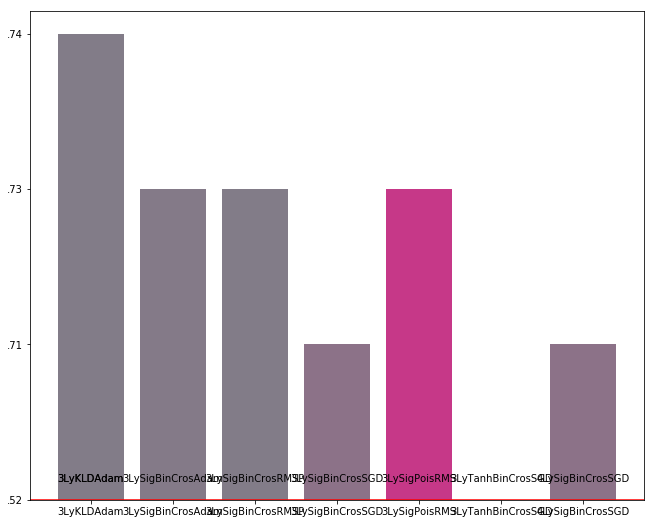

In [85]:
import matplotlib as plt
import matplotlib.pyplot as plot

accycolor = []
#Generate Colors on red/green axis based on execution time
for index in range(0,len(loss_result)):
    
    percent_red = float(loss_result[index])
    percent_green = 1 - percent_red
    red_10 = int(percent_red * 255)
    green_10 = int(percent_green * 255)
    red_16 = str(hex(red_10))[-2:].replace("x", "0")
    green_16 = str(hex(green_10))[-2:].replace("x", "0")
    accycolor.append("#"+str(red_16)+str(green_16)+"88")

fig, ax = plot.subplots(figsize=(11, 9))
rects = ax.bar(label_result, accuracy_result, color=accycolor)
random_chance = 0
plot.axhline(y=random_chance, color='r', linestyle='-')

# Indicate Times.
labels = ["%s" % l for l in label_result]


plot.plot()
for rect, label in zip(rects, labels):
    ax.text(rect.get_x() + rect.get_width() / 2, .1, label,ha='center', va='bottom')